In [6]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
GPO = pd.read_csv('Calpine Data/GPO_data.csv', parse_dates=True, index_col=0)
GPO.head()

,GPO,Reading
DateTime,,
2017-01-01 00:00:00,Gross Power Output - KPI,1.600000e-07
2017-01-01 00:05:00,Gross Power Output - KPI,1.600000e-07
2017-01-01 00:10:00,Gross Power Output - KPI,1.600000e-07
2017-01-01 00:15:00,Gross Power Output - KPI,1.600000e-07
2017-01-01 00:20:00,Gross Power Output - KPI,1.600000e-07


In [4]:
GPO_17 = GPO['2017']
GPO_17.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80674 entries, 2017-01-01 00:00:00 to 2017-10-08 16:55:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GPO      80674 non-null  object 
 1   Reading  80674 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


<ipython-input-4-666f9b1e9707>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  GPO_17 = GPO['2017']


In [5]:
GPO_17.tail()

,GPO,Reading
DateTime,,
2017-10-08 16:35:00,Gross Power Output - KPI,0.0
2017-10-08 16:40:00,Gross Power Output - KPI,0.0
2017-10-08 16:45:00,Gross Power Output - KPI,0.0
2017-10-08 16:50:00,Gross Power Output - KPI,0.0
2017-10-08 16:55:00,Gross Power Output - KPI,0.0


In [8]:
GPO_train = GPO_17['2017-1-1':'2017-10-07']
GPO_test = GPO_17['2017-10-08':'2017-12-31']

In [14]:
GPO_train.head()

,GPO,Reading
DateTime,,
2017-01-01 00:00:00,Gross Power Output - KPI,1.600000e-07
2017-01-01 00:05:00,Gross Power Output - KPI,1.600000e-07
2017-01-01 00:10:00,Gross Power Output - KPI,1.600000e-07
2017-01-01 00:15:00,Gross Power Output - KPI,1.600000e-07
2017-01-01 00:20:00,Gross Power Output - KPI,1.600000e-07


In [21]:
pd.date_range(start = '1-01-2017 00:00:00', end = '10-06-2017 23:55:00', freq = '5Min').difference(GPO_train.index)
# missing time periods
#https://stackoverflow.com/questions/51613132/check-time-series-data-for-missing-values/51686710

DatetimeIndex(['2017-10-05 23:00:00', '2017-10-05 23:05:00',
               '2017-10-05 23:10:00', '2017-10-05 23:15:00',
               '2017-10-05 23:20:00', '2017-10-05 23:25:00',
               '2017-10-05 23:30:00', '2017-10-05 23:35:00',
               '2017-10-05 23:40:00', '2017-10-05 23:45:00',
               '2017-10-05 23:50:00', '2017-10-05 23:55:00',
               '2017-10-06 13:00:00', '2017-10-06 13:05:00',
               '2017-10-06 13:10:00', '2017-10-06 13:15:00',
               '2017-10-06 13:20:00', '2017-10-06 13:25:00',
               '2017-10-06 13:30:00', '2017-10-06 13:35:00',
               '2017-10-06 13:40:00', '2017-10-06 13:45:00',
               '2017-10-06 13:50:00', '2017-10-06 13:55:00',
               '2017-10-06 18:00:00', '2017-10-06 18:05:00',
               '2017-10-06 18:10:00', '2017-10-06 18:15:00',
               '2017-10-06 18:20:00', '2017-10-06 18:25:00',
               '2017-10-06 18:30:00', '2017-10-06 18:35:00',
               '2017-10-

In [22]:
#eliminated October in train set
GPO_train = GPO_17['2017-1-1':'2017-09-30']
GPO_test = GPO_17['2017-10-01':'2017-12-31']

In [23]:
ses = SimpleExpSmoothing(GPO_train['Reading']).fit(smoothing_level=.5)
ses.summary()

C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,Reading,No. Observations:,78624
Model:,SimpleExpSmoothing,SSE,2426213.523
Optimized:,True,AIC,269637.940
Trend:,None,BIC,269656.485
Seasonal:,None,AICC,269637.941
Seasonal Periods:,None,Date:,"Mon, 24 May 2021"
Box-Cox:,False,Time:,10:50:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,1.6e-07,l.0,True


In [24]:
# Simple Exponential Smoothing model
ses_forecast = ses.forecast(len(GPO_test))
ses_forecast

2017-10-01 00:00:00    148.170645
2017-10-01 00:05:00    148.170645
2017-10-01 00:10:00    148.170645
2017-10-01 00:15:00    148.170645
2017-10-01 00:20:00    148.170645
                          ...    
2017-10-08 02:25:00    148.170645
2017-10-08 02:30:00    148.170645
2017-10-08 02:35:00    148.170645
2017-10-08 02:40:00    148.170645
2017-10-08 02:45:00    148.170645
Freq: 5T, Length: 2050, dtype: float64

In [26]:
df_predictions = GPO_test.copy(deep=True)

In [27]:
df_predictions['ses'] = ses_forecast

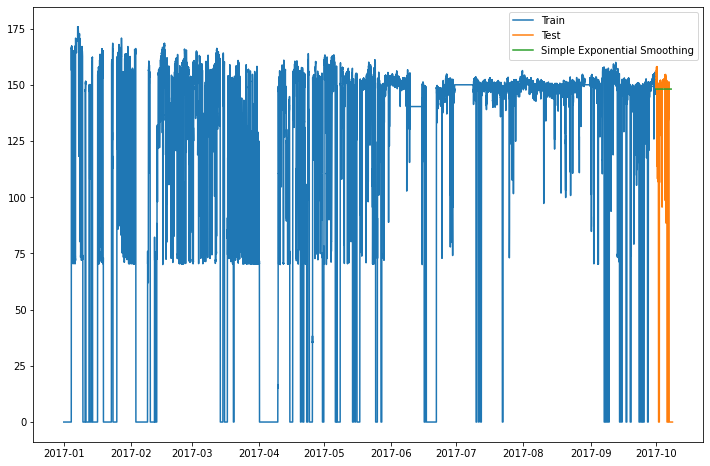

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(GPO_train['Reading'], label='Train')
plt.plot(GPO_test['Reading'], label='Test')


plt.plot(df_predictions['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best');

In [29]:
# Seasonal periods = (365-Dec31-Nov30-Oct31)*24hours*20readings/hour = 131,040
hw = ExponentialSmoothing(GPO_train['Reading'], seasonal_periods=131_040,
trend = 'mul', seasonal = 'add'
).fit()

C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'


ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

In [31]:
# getting error: https://stats.stackexchange.com/questions/90079/why-multiplicative-holt-winters-requires-strictly-positive-data-points
# I have negative data
GPO_train['Reading'].min()

-5.1e-07

In [32]:
# ...so lets make all values positive
GPO_train['Reading_Scaled'] = GPO_train['Reading'] + 6e-07
GPO_train.head()

<ipython-input-32-072b33c6917c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPO_train['Reading_Scaled'] = GPO_train['Reading'] + 6e-07


,GPO,Reading,Reading_Scaled
DateTime,,,
2017-01-01 00:00:00,Gross Power Output - KPI,1.600000e-07,7.600000e-07
2017-01-01 00:05:00,Gross Power Output - KPI,1.600000e-07,7.600000e-07
2017-01-01 00:10:00,Gross Power Output - KPI,1.600000e-07,7.600000e-07
2017-01-01 00:15:00,Gross Power Output - KPI,1.600000e-07,7.600000e-07
2017-01-01 00:20:00,Gross Power Output - KPI,1.600000e-07,7.600000e-07


In [33]:
GPO_train['Reading_Scaled'].min()

8.999999999999999e-08

In [34]:
# Let's try this again
hw = ExponentialSmoothing(GPO_train['Reading_Scaled'], seasonal_periods=131_040,
trend = 'mul', seasonal = 'add'
).fit()

C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:1265: RuntimeWarning: Mean of empty slice.
  b0 = np.exp((np.log(lead.mean()) - np.log(lag.mean())) / m)
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot copy sequence with size 78624 to array axis with dimension 131040

In [40]:
hw = ExponentialSmoothing(GPO_train['Reading_Scaled'], seasonal_periods=78624,
trend = 'mul', seasonal = 'add'
).fit()
# will take too long

C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:1265: RuntimeWarning: Mean of empty slice.
  b0 = np.exp((np.log(lead.mean()) - np.log(lag.mean())) / m)
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


MemoryError: Unable to allocate 392. GiB for an array with shape (52554129675,) and data type float64

In [41]:
import sys
sys.getsizeof(GPO_train)

8255536

In [42]:
GPO_19_Q4 = GPO['2019-10-01':'2019-12-31']
GPO_19_Q4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2019-10-01 00:00:00 to 2019-12-31 23:55:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GPO      26496 non-null  object 
 1   Reading  26496 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.0+ KB


In [43]:
GPO_20_Q1_test = pd.read_csv('Calpine Data/test_2020.csv', parse_dates=True, index_col=0)
GPO_20_Q1_test.head()

,GPO,Reading
DateTime,,
2020-01-01 00:00:00,Gross Power Output - KPI,-4.922416
2020-01-01 00:05:00,Gross Power Output - KPI,-3.670565
2020-01-01 00:10:00,Gross Power Output - KPI,-4.164237
2020-01-01 00:15:00,Gross Power Output - KPI,-4.294771
2020-01-01 00:20:00,Gross Power Output - KPI,-4.294771


In [44]:
GPO_20_Q1_test.tail()

,GPO,Reading
DateTime,,
2020-02-21 14:00:00,Gross Power Output - KPI,1.373594
2020-02-21 23:00:00,Gross Power Output - KPI,-4.581072
2020-02-21 23:05:00,Gross Power Output - KPI,-4.326606
2020-02-21 23:10:00,Gross Power Output - KPI,-4.387472
2020-02-21 23:15:00,Gross Power Output - KPI,-4.355206


In [46]:
pd.date_range(start = '1-01-2020 00:00:00', end = '02-20-2020 23:55:00', freq = '5Min').difference(GPO_20_Q1_test.index)


DatetimeIndex(['2020-01-01 07:55:00', '2020-01-01 08:45:00',
               '2020-01-01 08:50:00', '2020-01-01 08:55:00',
               '2020-01-01 09:00:00', '2020-01-01 09:05:00',
               '2020-01-01 09:10:00', '2020-01-01 09:15:00',
               '2020-01-01 09:20:00', '2020-01-01 09:25:00',
               ...
               '2020-02-20 20:50:00', '2020-02-20 20:55:00',
               '2020-02-20 21:00:00', '2020-02-20 21:05:00',
               '2020-02-20 21:10:00', '2020-02-20 21:15:00',
               '2020-02-20 21:20:00', '2020-02-20 21:25:00',
               '2020-02-20 22:10:00', '2020-02-20 22:15:00'],
              dtype='datetime64[ns]', length=2745, freq=None)

In [47]:
GPO_19_Q4.min()

GPO        Gross Power Output - KPI
Reading                         0.0
dtype: object

In [48]:
# make everything nonzero
GPO_19_Q4['Reading_Scaled'] = GPO_19_Q4['Reading'] + 1e-10
GPO_19_Q4.head()

<ipython-input-48-43ad6b70aaa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPO_19_Q4['Reading_Scaled'] = GPO_19_Q4['Reading'] + 1e-10


,GPO,Reading,Reading_Scaled
DateTime,,,
2019-10-01 00:00:00,Gross Power Output - KPI,147.009600,147.009600
2019-10-01 00:05:00,Gross Power Output - KPI,147.191467,147.191467
2019-10-01 00:10:00,Gross Power Output - KPI,147.256000,147.256000
2019-10-01 00:15:00,Gross Power Output - KPI,147.256000,147.256000
2019-10-01 00:20:00,Gross Power Output - KPI,147.639533,147.639533


In [49]:
pd.date_range(start = '10-01-2019 00:00:00', end = '12-31-2019 23:55:00', freq = '5Min').difference(GPO_19_Q4.index)


DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [52]:
hw = ExponentialSmoothing(GPO_19_Q4['Reading_Scaled'], seasonal_periods=26496,
trend = 'mul', seasonal = 'add'
).fit()
# STILL TOO DARN BIG

C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'


MemoryError: Unable to allocate 44.5 GiB for an array with shape (5970489819,) and data type float64

In [54]:
GPO_19_Q4_lean = GPO_19_Q4.drop(['GPO','Reading'], axis=1)

In [55]:
sys.getsizeof(GPO_19_Q4_lean)

1480760

In [56]:
GPO_19_Q4_lean.to_pickle('Calpine Data/Smaller_GPO_19_Q4.pkl')

In [57]:
Smaller_GPO_19_Q4_lean = pd.read_pickle('Calpine Data/Smaller_GPO_19_Q4.pkl')
sys.getsizeof(Smaller_GPO_19_Q4_lean)

423952

In [58]:
Smaller_GPO_19_Q4_lean.head()

,Reading_Scaled
DateTime,
2019-10-01 00:00:00,147.009600
2019-10-01 00:05:00,147.191467
2019-10-01 00:10:00,147.256000
2019-10-01 00:15:00,147.256000
2019-10-01 00:20:00,147.639533


In [59]:
hw = ExponentialSmoothing(Smaller_GPO_19_Q4_lean['Reading_Scaled'], seasonal_periods=26496,
trend = 'mul', seasonal = 'add'
).fit()

C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:1265: RuntimeWarning: Mean of empty slice.
  b0 = np.exp((np.log(lead.mean()) - np.log(lag.mean())) / m)
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


MemoryError: Unable to allocate 44.5 GiB for an array with shape (5970489819,) and data type float64

In [60]:
Hourly_GPO_19_Q4_lean = Smaller_GPO_19_Q4_lean.resample('60Min').mean()

In [61]:
Hourly_GPO_19_Q4_lean

,Reading_Scaled
DateTime,
2019-10-01 00:00:00,147.696733
2019-10-01 01:00:00,147.520917
2019-10-01 02:00:00,146.886400
2019-10-01 03:00:00,147.744644
2019-10-01 04:00:00,147.776789
...,...
2019-12-31 19:00:00,161.891133
2019-12-31 20:00:00,160.427033
2019-12-31 21:00:00,160.274989


In [62]:
hw = ExponentialSmoothing(Smaller_GPO_19_Q4_lean['Reading_Scaled'], seasonal_periods=2208,
trend = 'mul', seasonal = 'add'
).fit()

C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  warnings.warn('No frequency information was'
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\cjmartin\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [63]:
hw.summary()

Dep. Variable:,Reading_Scaled,No. Observations:,26496
Model:,ExponentialSmoothing,SSE,663018.089
Optimized:,True,AIC,89736.046
Trend:,Multiplicative,BIC,107840.711
Seasonal:,Additive,AICC,90139.984
Seasonal Periods:,2208,Date:,"Mon, 24 May 2021"
Box-Cox:,False,Time:,12:43:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8535714,alpha,True
smoothing_trend,0.0001,beta,True


In [64]:
hw_predictions = GPO_20_Q1_test.copy(deep=True)

In [65]:
hw_predictions['hw'] = hw.forecast(len(GPO_20_Q1_test))

In [66]:
hw_predictions

,GPO,Reading,hw
DateTime,,,
2020-01-01 00:00:00,Gross Power Output - KPI,-4.922416,186.221223
2020-01-01 00:05:00,Gross Power Output - KPI,-3.670565,226.368018
2020-01-01 00:10:00,Gross Power Output - KPI,-4.164237,261.836603
2020-01-01 00:15:00,Gross Power Output - KPI,-4.294771,284.344193
2020-01-01 00:20:00,Gross Power Output - KPI,-4.294771,295.469423
...,...,...,...
2020-02-21 14:00:00,Gross Power Output - KPI,1.373594,NaN
2020-02-21 23:00:00,Gross Power Output - KPI,-4.581072,NaN
2020-02-21 23:05:00,Gross Power Output - KPI,-4.326606,NaN


In [69]:
GPO_20_Q1_test.head()

,GPO,Reading
DateTime,,
2020-01-01 00:00:00,Gross Power Output - KPI,-4.922416
2020-01-01 00:05:00,Gross Power Output - KPI,-3.670565
2020-01-01 00:10:00,Gross Power Output - KPI,-4.164237
2020-01-01 00:15:00,Gross Power Output - KPI,-4.294771
2020-01-01 00:20:00,Gross Power Output - KPI,-4.294771


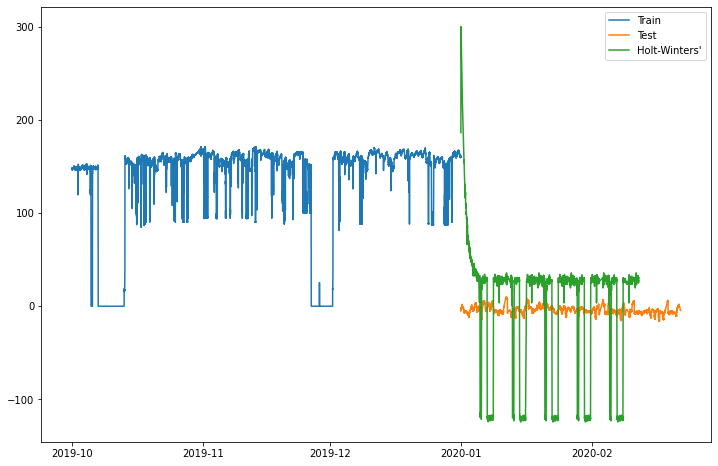

In [71]:
plt.figure(figsize=(12,8))
plt.plot(GPO_19_Q4['Reading_Scaled'], label='Train')
plt.plot(GPO_20_Q1_test['Reading'], label='Test')
plt.plot(hw_predictions['hw'], label="Holt-Winters'")
plt.legend(loc='best');

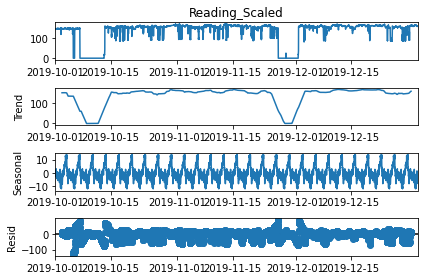

In [73]:
seasonal_decompose(GPO_19_Q4['Reading_Scaled'], period=960).plot();

In [74]:
import pmdarima as pmd

In [75]:
from pmdarima.utils import tsdisplay

In [78]:
model = pmd.auto_arima(GPO_19_Q4['Reading_Scaled'], m=48, trace=True)
# took too long

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[48] intercept   : AIC=138405.241, Time=318.17 sec
 ARIMA(0,1,0)(0,0,0)[48] intercept   : AIC=139675.675, Time=1.18 sec
 ARIMA(1,1,0)(1,0,0)[48] intercept   : AIC=138553.356, Time=75.92 sec


MemoryError: Unable to allocate 526. MiB for an array with shape (51, 51, 26497) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 982, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions.MemoryError: Unable to allocate 526. MiB for an array with shape (51, 51, 26497) and data type float64


AttributeError: Memoryview is not initialized